# 02 - Populations vs. Samples

**Population:** The entire group we want to understand (all Amazon customers, all voters in Texas, all Netflix subscribers)

**Sample:** A smaller group we can actually measure and study

**Key Idea:** We use the sample to make educated guesses about the population. The trick is getting a good sample that truly represents the larger group.

## Visual Concept: Using Small to Understand Big

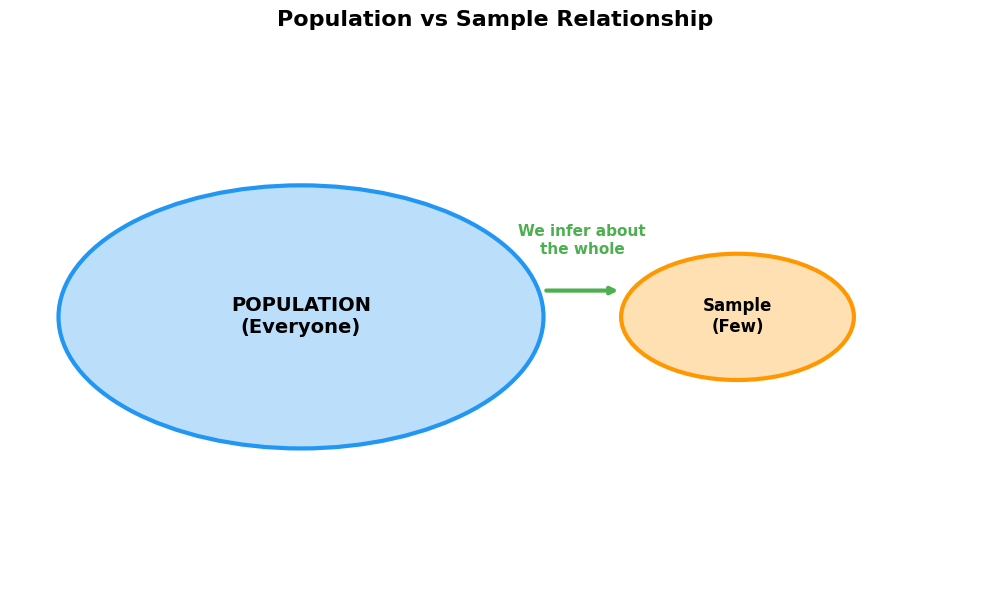

→ We study the SAMPLE to understand the POPULATION
→ Good sample = good predictions | Bad sample = bad predictions


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10, 6))

# Draw population circle (large)
population_circle = patches.Circle((0.3, 0.5), 0.25, linewidth=3, edgecolor='#2196F3', facecolor='#BBDEFB', label='Population')
ax.add_patch(population_circle)
ax.text(0.3, 0.5, 'POPULATION\n(Everyone)', ha='center', va='center', fontsize=14, fontweight='bold')

# Draw sample circle (small)
sample_circle = patches.Circle((0.75, 0.5), 0.12, linewidth=3, edgecolor='#FF9800', facecolor='#FFE0B2', label='Sample')
ax.add_patch(sample_circle)
ax.text(0.75, 0.5, 'Sample\n(Few)', ha='center', va='center', fontsize=12, fontweight='bold')

# Draw arrow from sample to population (inference)
ax.annotate('', xy=(0.55, 0.55), xytext=(0.63, 0.55),
            arrowprops=dict(arrowstyle='<-', lw=3, color='#4CAF50'))
ax.text(0.59, 0.62, 'We infer about\nthe whole', ha='center', fontsize=11, color='#4CAF50', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('Population vs Sample Relationship', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("→ We study the SAMPLE to understand the POPULATION")
print("→ Good sample = good predictions | Bad sample = bad predictions")

## Simple Example: School Preferences

Imagine a school with 500 students. We want to know their favorite lunch option, but we can't ask everyone. So we survey 50 students (our sample).

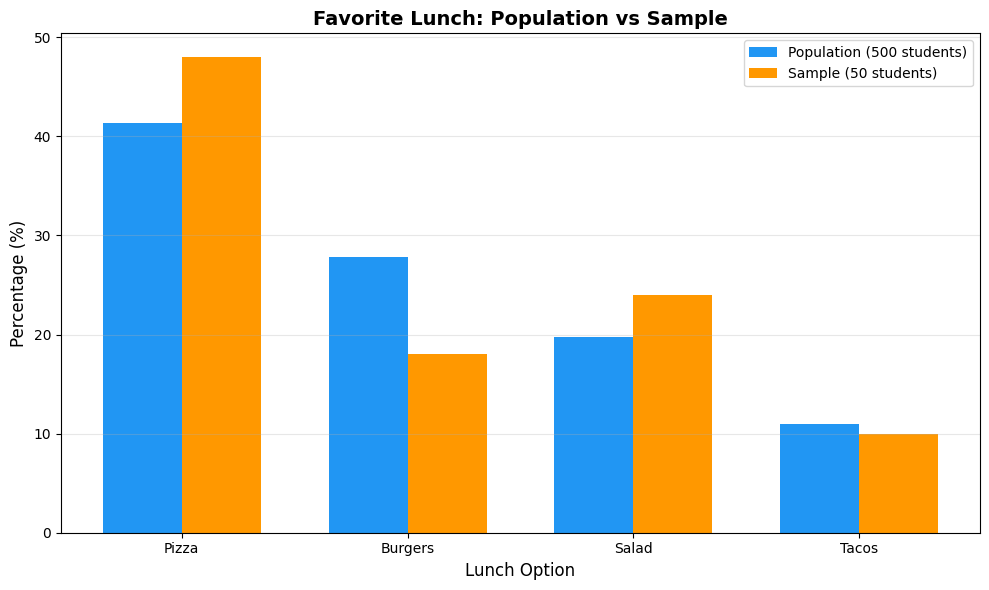


Population Preferences (True):
  Pizza: 41.4%
  Burgers: 27.8%
  Salad: 19.8%
  Tacos: 11.0%

Sample Estimates:
  Pizza: 48.0%
  Burgers: 18.0%
  Salad: 24.0%
  Tacos: 10.0%

→ Sample is close to population, but not perfect!


In [2]:
import numpy as np

np.random.seed(42)

# TRUE population preferences (what we're trying to discover)
population_prefs = {
    'Pizza': 0.40,
    'Burgers': 0.30,
    'Salad': 0.20,
    'Tacos': 0.10
}

# Generate full population of 500 students
population = np.random.choice(
    list(population_prefs.keys()),
    size=500,
    p=list(population_prefs.values())
)

# Take a sample of 50 students
sample = np.random.choice(population, size=50, replace=False)

# Calculate percentages
options = list(population_prefs.keys())
pop_counts = [np.sum(population == opt) / len(population) * 100 for opt in options]
sample_counts = [np.sum(sample == opt) / len(sample) * 100 for opt in options]

# Visualize
x = np.arange(len(options))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, pop_counts, width, label='Population (500 students)', color='#2196F3')
bars2 = ax.bar(x + width/2, sample_counts, width, label='Sample (50 students)', color='#FF9800')

ax.set_xlabel('Lunch Option', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Favorite Lunch: Population vs Sample', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(options)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPopulation Preferences (True):")
for i, opt in enumerate(options):
    print(f"  {opt}: {pop_counts[i]:.1f}%")

print("\nSample Estimates:")
for i, opt in enumerate(options):
    print(f"  {opt}: {sample_counts[i]:.1f}%")

print("\n→ Sample is close to population, but not perfect!")

## Real-World Example: Netflix User Preferences

Netflix has 200 million subscribers worldwide. They can't survey everyone, so they sample 5,000 users to understand genre preferences. Let's see how well samples represent the population.

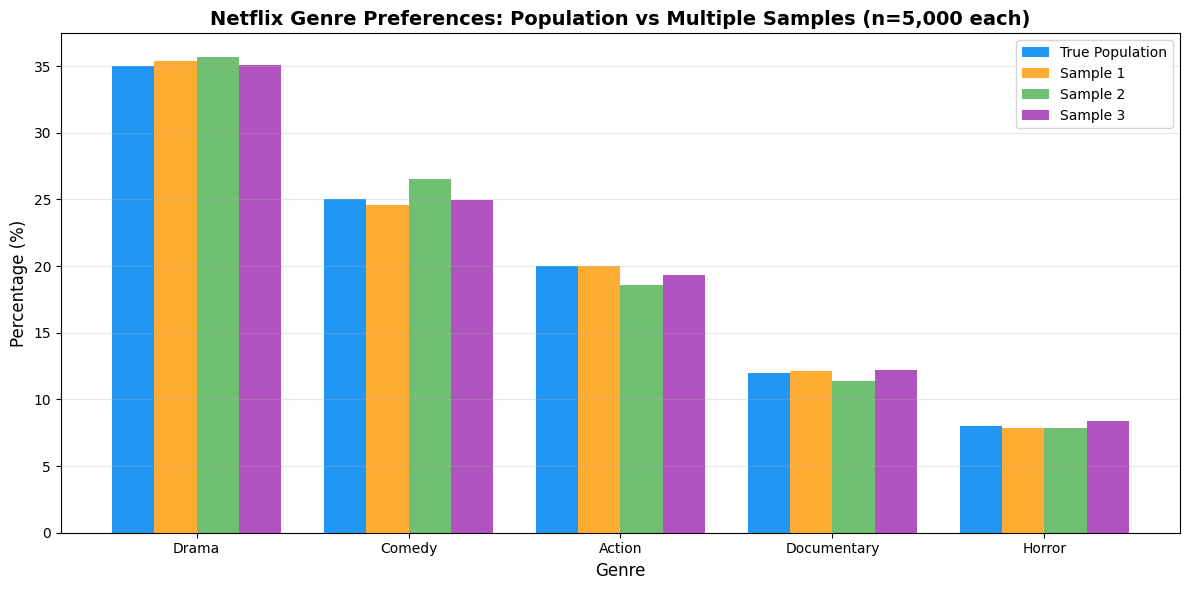


True Population (200M users):
  Drama: 35.0%
  Comedy: 25.0%
  Action: 20.0%
  Documentary: 12.0%
  Horror: 8.0%

Sample 1 (5,000 users):
  Drama: 35.4%
  Comedy: 24.6%
  Action: 20.0%
  Documentary: 12.1%
  Horror: 7.9%

→ Different samples give slightly different results (sampling variability)
→ But all samples are close to the true population values!
→ This is why representative sampling is critical for predictive analytics


In [3]:
# TRUE population preferences for Netflix (200 million users)
netflix_prefs = {
    'Drama': 0.35,
    'Comedy': 0.25,
    'Action': 0.20,
    'Documentary': 0.12,
    'Horror': 0.08
}

# Simulate population
np.random.seed(42)
population_size = 200_000_000
sample_size = 5_000

# Generate 3 different samples to show sampling variability
genres = list(netflix_prefs.keys())
true_prefs = [netflix_prefs[g] * 100 for g in genres]

samples = []
for i in range(3):
    sample = np.random.choice(
        genres,
        size=sample_size,
        p=list(netflix_prefs.values())
    )
    sample_prefs = [np.sum(sample == g) / sample_size * 100 for g in genres]
    samples.append(sample_prefs)

# Visualize
x = np.arange(len(genres))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - 1.5*width, true_prefs, width, label='True Population', color='#2196F3')
ax.bar(x - 0.5*width, samples[0], width, label='Sample 1', color='#FF9800', alpha=0.8)
ax.bar(x + 0.5*width, samples[1], width, label='Sample 2', color='#4CAF50', alpha=0.8)
ax.bar(x + 1.5*width, samples[2], width, label='Sample 3', color='#9C27B0', alpha=0.8)

ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Percentage (%)', fontsize=12)
ax.set_title('Netflix Genre Preferences: Population vs Multiple Samples (n=5,000 each)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(genres)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTrue Population (200M users):")
for i, genre in enumerate(genres):
    print(f"  {genre}: {true_prefs[i]:.1f}%")

print("\nSample 1 (5,000 users):")
for i, genre in enumerate(genres):
    print(f"  {genre}: {samples[0][i]:.1f}%")

print("\n→ Different samples give slightly different results (sampling variability)")
print("→ But all samples are close to the true population values!")
print("→ This is why representative sampling is critical for predictive analytics")

## Key Takeaway

**Predictive analytics lives or dies on sampling quality:**
- ✅ Good sample (representative) → Accurate predictions
- ❌ Bad sample (biased) → Terrible predictions

**Remember:** We can never measure everyone, so we must be smart about who we sample!